### Here is where my prediciton model will be developed for traffic congestion in South Dublin
#### Firstly, we want to split the prepared dataset up into Weekdays VS Weekends, traffic congestion will vary a lot depedning on the time in the week, so it is best to treat the weekdays (the working week) differently to the weekend

In [1]:
#Importations of libraries needed:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy import stats

In [2]:
#Import dataset as dataframe:
df = pd.read_csv('../Datasets/TrafficFlow/prepared_FlowJanJun2022.csv')
df = df.drop('ObjectId', axis=1)
df = df.drop('Unnamed: 0', axis=1) # Remove unknown column
print("The data contains {0} rows and {1} columns".format(df.shape[0], df.shape[1]))
df.head(5)

The data contains 25105 rows and 8 columns


,site,day,date,start_time,end_time,flow,cong,dsat
0,N01111A,TU,04/01/2022,2022/11/07 11:45:00+00,12:00,6.098074,1.098612,3.637586
1,N01111A,TU,04/01/2022,2022/11/07 14:00:00+00,14:15,6.230481,1.098612,3.688879
2,N01111A,TU,04/01/2022,2022/11/07 14:15:00+00,14:30,6.265301,1.609438,3.663562
3,N01111A,MO,03/01/2022,2022/11/07 12:45:00+00,13:00,5.843544,1.098612,3.401197
4,N01111A,TU,04/01/2022,2022/11/07 15:45:00+00,16:00,5.953243,1.098612,3.465736


In [3]:
# Change form of start_time to match end_time
df['start_time'] = pd.to_datetime(df['start_time']).dt.strftime('%H:%M')
df.head(5)

,site,day,date,start_time,end_time,flow,cong,dsat
0,N01111A,TU,04/01/2022,11:45,12:00,6.098074,1.098612,3.637586
1,N01111A,TU,04/01/2022,14:00,14:15,6.230481,1.098612,3.688879
2,N01111A,TU,04/01/2022,14:15,14:30,6.265301,1.609438,3.663562
3,N01111A,MO,03/01/2022,12:45,13:00,5.843544,1.098612,3.401197
4,N01111A,TU,04/01/2022,15:45,16:00,5.953243,1.098612,3.465736


In [4]:
# Get unique values in the 'day' column
unique_days = df['day'].unique()

# Print the unique values
print(unique_days)

['TU' 'MO' 'TH' 'FR' 'WE' 'SA' 'SU']


#### Commpare congestion weekday vs weekend

In [5]:
# Filter for weekdays
df_weekday = df[df['day'].isin(['MO', 'TU', 'WE', 'TH', 'FR'])]

# Filter for weekend
df_weekend = df[df['day'].isin(['SA', 'SU'])]

# Now, df_weekday contains entries for Monday to Friday, and df_weekend contains entries for Saturday and Sunday
print(df_weekday['day'].unique())
print(df_weekend['day'].unique())

['TU' 'MO' 'TH' 'FR' 'WE']
['SA' 'SU']


In [6]:
def showDistribution(dataframe1, dataframe2):
    columns = ['flow', 'cong', 'dsat']  # The columns to plot

    for col in columns:
        plt.figure(figsize=(10, 4))
        # Plot the first DataFrame histogram
        plt.hist(dataframe1[col], bins=30, color='r', alpha=0.6, label='Weekdays')
        # Plot the second DataFrame histogram
        plt.hist(dataframe2[col], bins=30, color='b', alpha=0.6, label='Weekends')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {col}')
        plt.legend()
        plt.show()

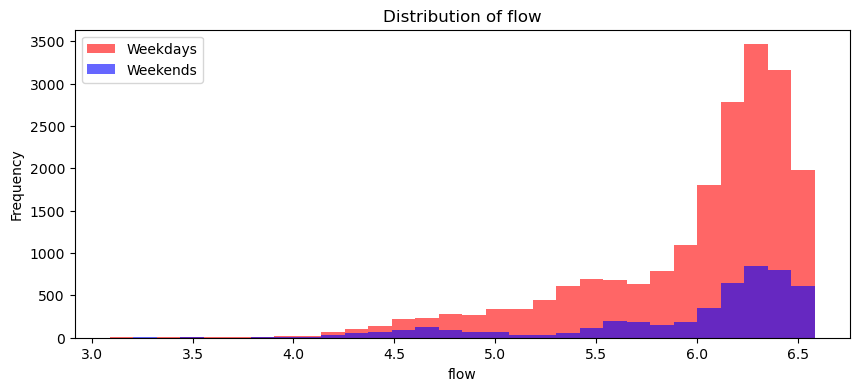

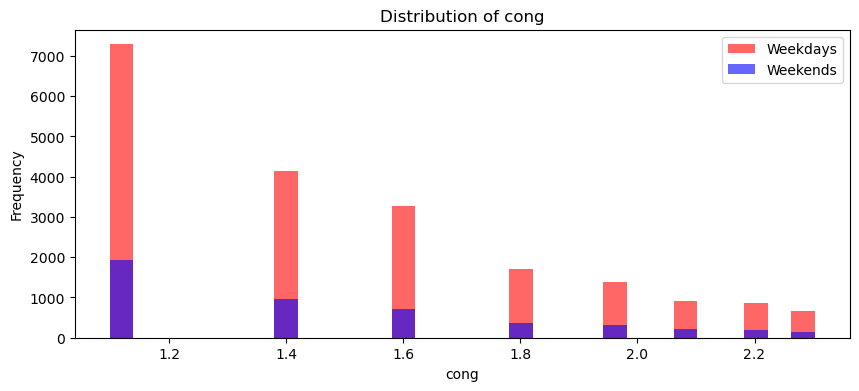

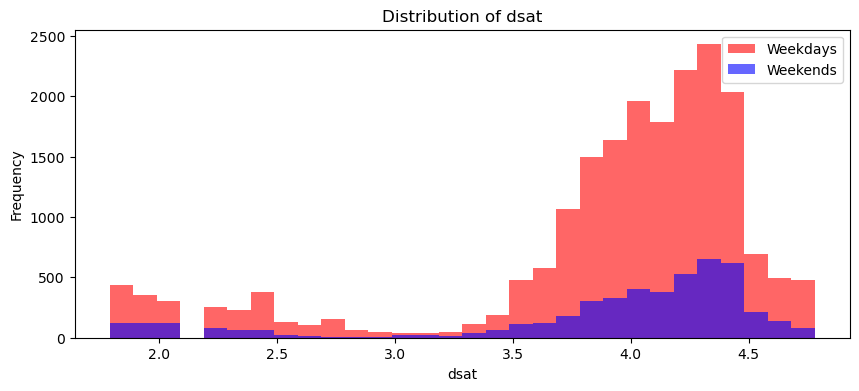

In [7]:
showDistribution(df_weekday, df_weekend)

#### Compare total `flow`, `cong` and `dsat` based on the Days

In [8]:
def showDistributionByDay(dataframe):
    columns = ['flow', 'cong', 'dsat']  # The columns to plot
    days = ['MO', 'TU', 'WE', 'TH', 'FR', 'SA', 'SU']  # Days of the week

    for col in columns:
        plt.figure(figsize=(8, 6))
        totals = []  # Initialize an empty list to store totals for all days
        for day in days:
            # Sum the values in the current column for the current day
            total = dataframe[dataframe['day'] == day][col].sum()
            totals.append(total)
        # Plot the totals for all days for the current column
        plt.bar(days, totals, alpha=0.6)
        plt.xlabel('Day')
        plt.ylabel(f'Total {col}')
        plt.title(f'Total {col} by Day')
        plt.show()


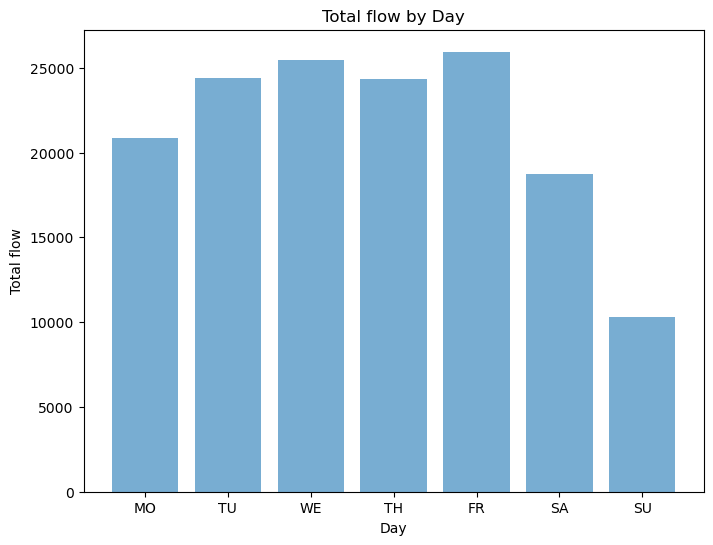

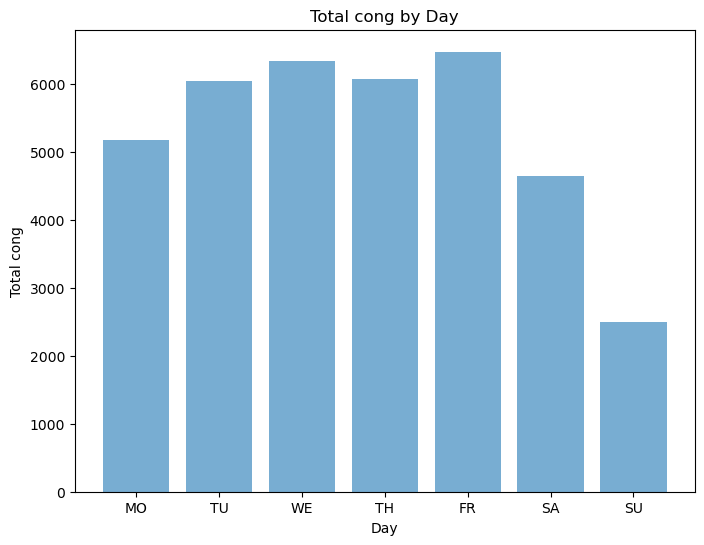

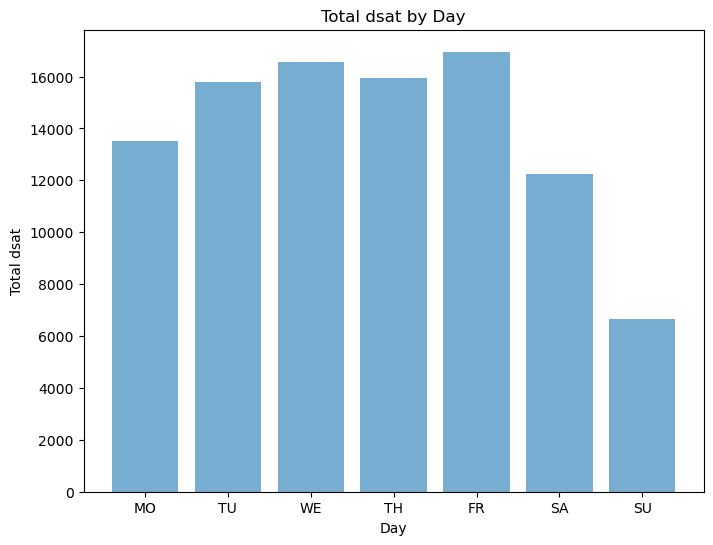

In [9]:
showDistributionByDay(df)

#### Compare total `flow`, `cong` and `dsat` based on the time

In [10]:
import matplotlib.pyplot as plt

def showDistributionByStartTime(dataframe):
    columns = ['flow', 'cong', 'dsat']  # The columns to plot

    # Assuming 'start_time' is already in an appropriate format for direct use
    # (e.g., each value uniquely identifies a time period to group by)

    # Get unique start times in the order they appear in the dataframe
    unique_start_times = dataframe['start_time'].sort_values().unique()

    for col in columns:
        plt.figure(figsize=(12, 6))  # Adjusted figure size for potentially large number of unique times
        totals = []  # Initialize an empty list to store totals for each unique start time
        
        for start_time in unique_start_times:
            # Sum the values in the current column for the current start time
            total = dataframe[dataframe['start_time'] == start_time][col].sum()
            totals.append(total)
        
        # Plot the totals for each unique start time for the current column
        plt.bar(range(len(unique_start_times)), totals, alpha=0.6)
        plt.xticks(range(len(unique_start_times)), labels=unique_start_times, rotation=90)  # Rotate labels for readability
        plt.xlabel('Start Time')
        plt.ylabel(f'Total {col}')
        plt.title(f'Total {col} by Start Time')
        plt.tight_layout()  # Adjust layout to make room for label rotation
        plt.show()


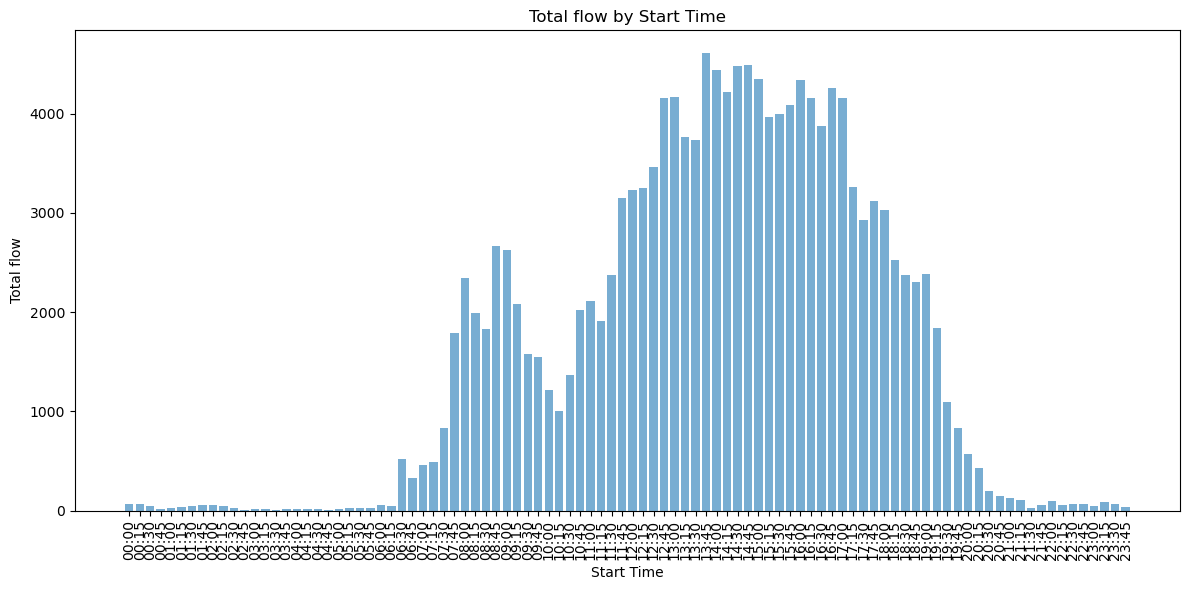

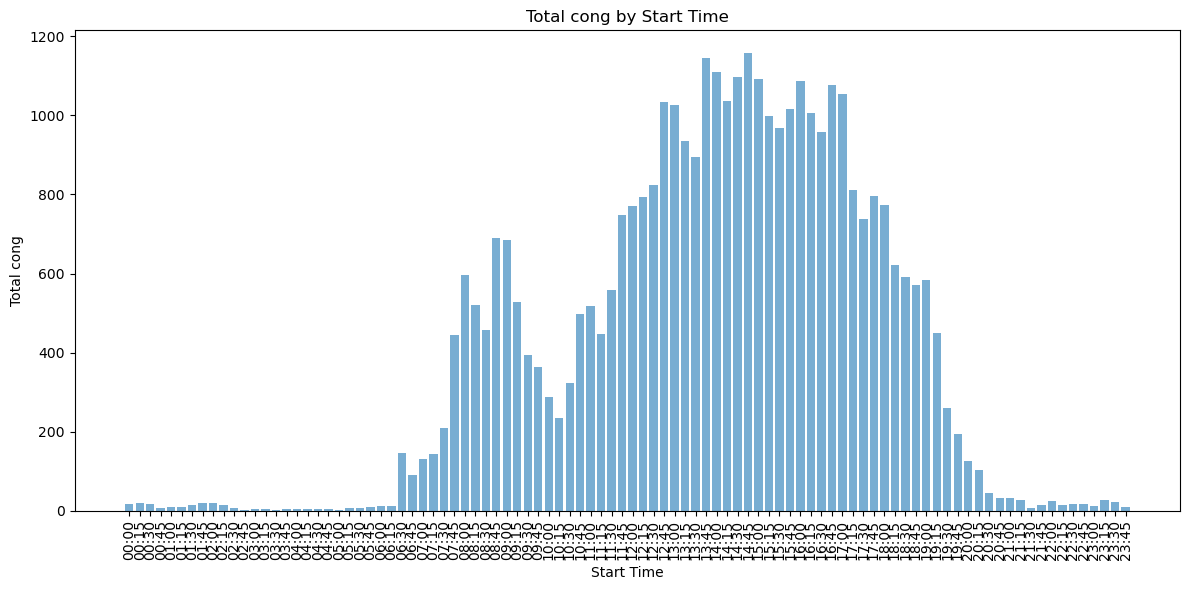

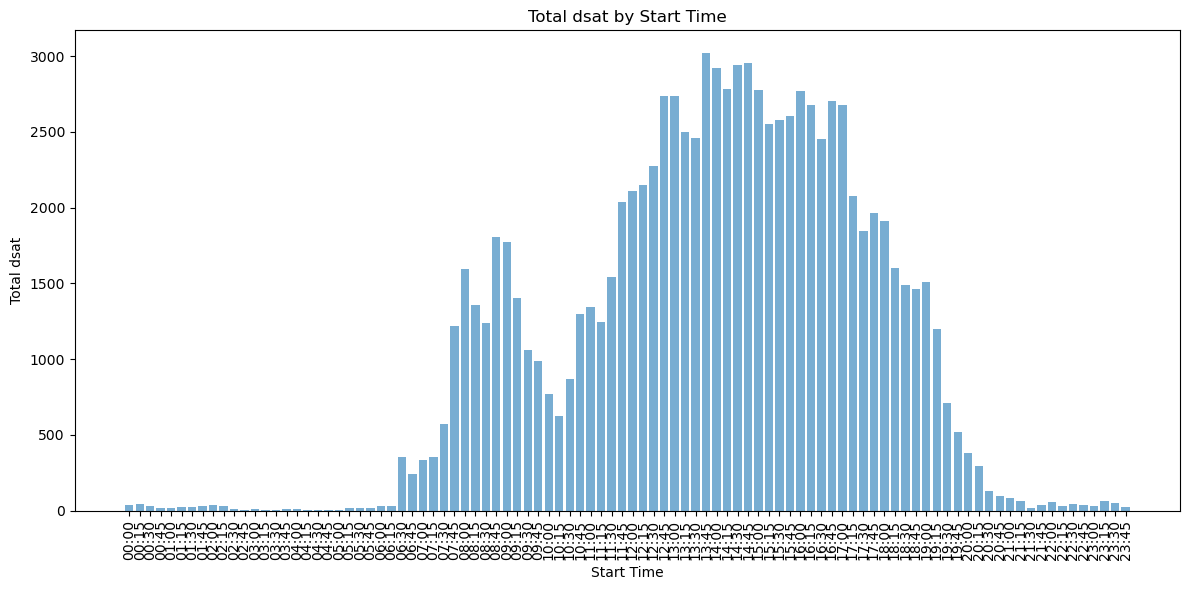

In [11]:
showDistributionByStartTime(df)

In [12]:
df_weekday.dtypes

site           object
day            object
date           object
start_time     object
end_time       object
flow          float64
cong          float64
dsat          float64
dtype: object

### Now we must reformat the data so that the formats of the data can be read by our prediction model

In [13]:
df.head(5)

,site,day,date,start_time,end_time,flow,cong,dsat
0,N01111A,TU,04/01/2022,11:45,12:00,6.098074,1.098612,3.637586
1,N01111A,TU,04/01/2022,14:00,14:15,6.230481,1.098612,3.688879
2,N01111A,TU,04/01/2022,14:15,14:30,6.265301,1.609438,3.663562
3,N01111A,MO,03/01/2022,12:45,13:00,5.843544,1.098612,3.401197
4,N01111A,TU,04/01/2022,15:45,16:00,5.953243,1.098612,3.465736


In [14]:
def reformatDatafram(dataframe):
    # Handle "24:00" in 'end_time'
    dataframe['end_time'] = dataframe['end_time'].replace('24:00', '00:00')

    # Convert 'date' to datetime
    dataframe['date'] = pd.to_datetime(dataframe['date'], format='%d/%m/%Y')

    # Convert 'start_time' and 'end_time' to datetime
    dataframe['start_time'] = pd.to_datetime(dataframe['start_time'], format='%H:%M')
    dataframe['end_time'] = pd.to_datetime(dataframe['end_time'], format='%H:%M')

    # Increment the date by one day where end_time is "00:00"
    dataframe.loc[dataframe['end_time'].dt.strftime('%H:%M') == '00:00', 'date'] += pd.Timedelta(days=1)

    # Extract year, month, and day as new features
    dataframe['year'] = dataframe['date'].dt.year
    dataframe['month'] = dataframe['date'].dt.month
    dataframe['day_of_month'] = dataframe['date'].dt.day

    # Calculate duration in minutes as a new feature
    dataframe['duration'] = (dataframe['end_time'] - dataframe['start_time']).dt.total_seconds() / 60

    # Extract hour and minute from 'start_time' and 'end_time'
    dataframe['start_hour'] = dataframe['start_time'].dt.hour
    dataframe['start_minute'] = dataframe['start_time'].dt.minute
    dataframe['end_hour'] = dataframe['end_time'].dt.hour
    dataframe['end_minute'] = dataframe['end_time'].dt.minute

    # Convert 'site' and 'day' to string type if they aren't already
    dataframe['site'] = dataframe['site'].astype(str)
    dataframe['day'] = dataframe['day'].astype(str)

    # One-hot encode 'site' and 'day' features
    dataframe = pd.get_dummies(dataframe, columns=['site', 'day'])

    # Now drop the original 'date', 'start_time', and 'end_time' columns as they are not needed
    dataframe = dataframe.drop(['date', 'start_time', 'end_time'], axis=1)
    
    return dataframe

In [15]:
df_weekday.head(5)

,site,day,date,start_time,end_time,flow,cong,dsat
0,N01111A,TU,04/01/2022,11:45,12:00,6.098074,1.098612,3.637586
1,N01111A,TU,04/01/2022,14:00,14:15,6.230481,1.098612,3.688879
2,N01111A,TU,04/01/2022,14:15,14:30,6.265301,1.609438,3.663562
3,N01111A,MO,03/01/2022,12:45,13:00,5.843544,1.098612,3.401197
4,N01111A,TU,04/01/2022,15:45,16:00,5.953243,1.098612,3.465736


In [16]:
df_weekday = reformatDatafram(df_weekday)
df_weekend = reformatDatafram(df_weekend)

/var/folders/fj/1ykv5jrn7k5bplnhdvwsmzmr0000gn/T/ipykernel_1975/1087561398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['end_time'] = dataframe['end_time'].replace('24:00', '00:00')
/var/folders/fj/1ykv5jrn7k5bplnhdvwsmzmr0000gn/T/ipykernel_1975/1087561398.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['date'] = pd.to_datetime(dataframe['date'], format='%d/%m/%Y')
/var/folders/fj/1ykv5jrn7k5bplnhdvwsmzmr0000gn/T/ipykernel_1975/1087561398.py:9: SettingWithCopyWarning: 
A value

In [17]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

# Now, when you display your DataFrame, all columns will be shown
print(df_weekday)
print(df_weekend)

           flow      cong      dsat  year  month  day_of_month  duration  \
0      6.098074  1.098612  3.637586  2022      1             4      15.0   
1      6.230481  1.098612  3.688879  2022      1             4      15.0   
2      6.265301  1.609438  3.663562  2022      1             4      15.0   
3      5.843544  1.098612  3.401197  2022      1             3      15.0   
4      5.953243  1.098612  3.465736  2022      1             4      15.0   
...         ...       ...       ...   ...    ...           ...       ...   
25100  5.313206  1.098612  4.499810  2022      4             5      15.0   
25101  5.655992  1.945910  4.700480  2022      4             5      15.0   
25102  5.746203  2.302585  4.644391  2022      4             4      15.0   
25103  5.411646  1.098612  4.605170  2022      4             8      15.0   
25104  5.627621  2.079442  4.584967  2022      4             8      15.0   

       start_hour  start_minute  end_hour  end_minute  site_N01111A  \
0              1

In [18]:
df_weekday.shape

(20231, 54)

In [19]:
df_weekday.head(5)

,flow,cong,dsat,year,month,day_of_month,duration,start_hour,start_minute,end_hour,end_minute,site_N01111A,site_N01111C,site_N01111D,site_N01111M,site_N01111R,site_N01121E,site_N01121G,site_N01121H,site_N01121J,site_N01121V,site_N01131A,site_N01131B,site_N01131C,site_N01131F,site_N01131P,site_N01141G,site_N01151A,site_N01151B,site_N01151C,site_N01151J,site_N01151L,site_N02111A,site_N02111B,site_N02111C,site_N02111D,site_N02111K,site_N02111M,site_N02121E,site_N02121G,site_N02121H,site_N02131A,site_N02131C,site_N02131D,site_N03111B,site_N03111D,site_N03111L,site_N03121A,site_N03121D,day_FR,day_MO,day_TH,day_TU,day_WE
0,6.098074,1.098612,3.637586,2022,1,4,15.0,11,45,12,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,6.230481,1.098612,3.688879,2022,1,4,15.0,14,0,14,15,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,6.265301,1.609438,3.663562,2022,1,4,15.0,14,15,14,30,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,5.843544,1.098612,3.401197,2022,1,3,15.0,12,45,13,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,5.953243,1.098612,3.465736,2022,1,4,15.0,15,45,16,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [20]:
df_weekend.shape

(4874, 49)

In [21]:
df_weekend.head(5)

,flow,cong,dsat,year,month,day_of_month,duration,start_hour,start_minute,end_hour,end_minute,site_N01111A,site_N01111C,site_N01111D,site_N01111M,site_N01121E,site_N01121G,site_N01121H,site_N01121J,site_N01121V,site_N01131A,site_N01131B,site_N01131C,site_N01131F,site_N01141G,site_N01151A,site_N01151B,site_N01151C,site_N01151J,site_N01151L,site_N02111A,site_N02111B,site_N02111C,site_N02111D,site_N02111K,site_N02111M,site_N02121E,site_N02121G,site_N02121H,site_N02131A,site_N02131C,site_N02131D,site_N03111B,site_N03111D,site_N03111L,site_N03121A,site_N03121D,day_SA,day_SU
30,6.466145,1.098612,3.828641,2022,1,15,15.0,12,0,12,15,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
32,5.948035,1.386294,3.433987,2022,1,16,15.0,12,0,12,15,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
33,6.146329,1.098612,3.688879,2022,1,16,15.0,14,0,14,15,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
65,6.434547,1.098612,3.806662,2022,1,22,15.0,12,0,12,15,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
66,6.386879,1.945910,3.713572,2022,1,22,15.0,12,15,12,30,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [22]:
sites_columns = [col for col in df_weekday.columns if col.startswith('site_')]

# Now, `sites_columns` is a list of column names that start with 'site_'
# You can enumerate over this list as needed
for index, site in enumerate(sites_columns):
    print(f"Index: {index}, Site Column: {site}")

Index: 0, Site Column: site_N01111A
Index: 1, Site Column: site_N01111C
Index: 2, Site Column: site_N01111D
Index: 3, Site Column: site_N01111M
Index: 4, Site Column: site_N01111R
Index: 5, Site Column: site_N01121E
Index: 6, Site Column: site_N01121G
Index: 7, Site Column: site_N01121H
Index: 8, Site Column: site_N01121J
Index: 9, Site Column: site_N01121V
Index: 10, Site Column: site_N01131A
Index: 11, Site Column: site_N01131B
Index: 12, Site Column: site_N01131C
Index: 13, Site Column: site_N01131F
Index: 14, Site Column: site_N01131P
Index: 15, Site Column: site_N01141G
Index: 16, Site Column: site_N01151A
Index: 17, Site Column: site_N01151B
Index: 18, Site Column: site_N01151C
Index: 19, Site Column: site_N01151J
Index: 20, Site Column: site_N01151L
Index: 21, Site Column: site_N02111A
Index: 22, Site Column: site_N02111B
Index: 23, Site Column: site_N02111C
Index: 24, Site Column: site_N02111D
Index: 25, Site Column: site_N02111K
Index: 26, Site Column: site_N02111M
Index: 27, 

## Prediction Model

#### Advantages of MAE
Interpretability: MAE is easy to understand and interpret. It represents the average absolute difference between the predicted values and the actual values, giving a straightforward indication of the prediction error magnitude.

Scale Sensitivity: Because MAE is on the same scale as your data, it can be a useful metric when the magnitude of the values is important in your analysis or application.

Outlier Sensitivity: MAE is less sensitive to outliers than some other metrics, like the Mean Squared Error (MSE) or Root Mean Squared Error (RMSE). This characteristic can be advantageous if you believe outliers should not disproportionately influence the evaluation of your model's performance.

## Weekdays (Mon-Fri)

### Test

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from math import sqrt

# Assume df_weekday is predefined and includes 'flow', 'cong', 'dsat', and 'start_hour' among other columns

# Split into features and targets
X = df_weekday.drop(['flow', 'cong', 'dsat'], axis=1)
y = df_weekday[['flow', 'cong', 'dsat']]

# Normalize features excluding 'start_hour'
columns_to_scale = df_weekday.columns.difference(['flow', 'cong', 'dsat', 'start_hour'])
X_to_scale = df_weekday[columns_to_scale]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_to_scale)
X_scaled_df = pd.DataFrame(X_scaled, columns=columns_to_scale, index=df_weekday.index)

# Add 'start_hour' back to the scaled features
X_scaled_df['start_hour'] = df_weekday['start_hour']

# Split data into training and testing sets
X_train, X_test, y_train, y_test, start_hour_train, start_hour_test = train_test_split(
    X_scaled_df.drop('start_hour', axis=1), y, df_weekday['start_hour'], test_size=0.2, random_state=42)

# Reshape input to be [samples, time steps, features]
X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Parameters to try
neurons = [10, 50, 100]  # Different numbers of neurons
learning_rates = [0.001, 0.01, 0.1]  # Different learning rates
activation_functions = ['relu', 'tanh', 'sigmoid']  # Different activation functions

# Function to create and evaluate the model
def train_and_evaluate_model(neurons, lr, activation):
    model = Sequential([
        LSTM(neurons, activation=activation, input_shape=(1, X_train.shape[1])),
        Dense(3)  # Assuming 3 output features: 'flow', 'cong', 'dsat'
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error')
    
    # Fit model
    model.fit(X_train_reshaped, y_train, epochs=100, validation_data=(X_test_reshaped, y_test), batch_size=32, verbose=0)
    
    # Predict on reshaped test set
    predictions = model.predict(X_test_reshaped)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, predictions)
    mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

    print(f"MAE:{mae} || MSE:{mse} || R2:{r2} || MAPE:{mape} || Model: {model} ")
    return mae, mse, rmse, r2, mape, model

# Store results
results = []

# Iterate over parameter combinations
for neuron in neurons:
    for lr in learning_rates:
        for activation in activation_functions:
            mae, mse, rmse, r2, mape, trained_model = train_and_evaluate_model(neuron, lr, activation)
            results.append({
                'neurons': neuron,
                'learning_rate': lr,
                'activation': activation,
                'MAE': mae,
                'MSE': mse,
                'RMSE': rmse,
                'R2': r2,
                'MAPE': mape,
                'model': trained_model
            })

# Find the best configuration (e.g., lowest MAE)
best_result = sorted(results, key=lambda x: x['MAE'])[0]

print("Best configuration:", best_result)

# Assuming the plotting part remains the same, use the best model from best_result['model']
# For the plotting, you will need to adjust the part where it uses `predictions` and `y_test`
# according to the best model. The rest of the plotting code would follow here.

127/127 [==============================] - 0s 362us/step


MAE:0.19313560113278375 || MSE:0.06860621625886469 || R2:0.6280927052769442 || MAPE:9.05220398107603 || Model: <keras.src.engine.sequential.Sequential object at 0x2d21b9e50> 
127/127 [==============================] - 0s 330us/step


MAE:0.19783827571103543 || MSE:0.07090381783067577 || R2:0.6205310721041929 || MAPE:9.328459048423383 || Model: <keras.src.engine.sequential.Sequential object at 0x2cc26efd0> 
127/127 [==============================] - 0s 335us/step


MAE:0.19757656024171918 || MSE:0.07211394546823939 || R2:0.6181411153553089 || MAPE:9.294780259538161 || Model: <keras.src.engine.sequential.Sequential object at 0x2dbe90ad0> 
127/127 [==============================] - 0s 328us/step


MAE:0.198772324847908 || MSE:0.07051881527538421 || R2:0.6202523718694408 || MAPE:9.480582763178127 || Model: <keras.src.engine.sequential.Sequential object at 0x2dd14c650> 
127/127 [==============================] - 0s 347us/step


MAE:0.19311042003588308 || MSE:0.06839173178460084 || R2:0.6268390903745408 || MAPE:9.330831864620388 || Model: <keras.src.engine.sequential.Sequential object at 0x2dffcc050> 
127/127 [==============================] - 0s 335us/step


MAE:0.1921517931614879 || MSE:0.06772846610284404 || R2:0.6319608542814193 || MAPE:9.022701592481303 || Model: <keras.src.engine.sequential.Sequential object at 0x2e0050b50> 
127/127 [==============================] - 0s 326us/step


MAE:0.22701048867312257 || MSE:0.09029667556503664 || R2:0.5481127744642867 || MAPE:9.702841453416807 || Model: <keras.src.engine.sequential.Sequential object at 0x2e14bc750> 
127/127 [==============================] - 0s 352us/step


MAE:0.21957681703338494 || MSE:0.08278260197063092 || R2:0.5632875181848188 || MAPE:9.190637022492828 || Model: <keras.src.engine.sequential.Sequential object at 0x2e56c0a50> 
127/127 [==============================] - 0s 322us/step


MAE:0.20520573722045488 || MSE:0.07540688221879736 || R2:0.598385853693126 || MAPE:8.919474439765281 || Model: <keras.src.engine.sequential.Sequential object at 0x2e567f010> 
127/127 [==============================] - 0s 450us/step


MAE:0.19124279243049502 || MSE:0.0664717429115428 || R2:0.6359205706834511 || MAPE:9.008491000850487 || Model: <keras.src.engine.sequential.Sequential object at 0x2dc000510> 
127/127 [==============================] - 0s 360us/step


MAE:0.19743245031389808 || MSE:0.07052065426163369 || R2:0.6221447580396814 || MAPE:9.305302575956787 || Model: <keras.src.engine.sequential.Sequential object at 0x2eb797550> 
127/127 [==============================] - 0s 344us/step


MAE:0.19693237951223116 || MSE:0.072090172747162 || R2:0.6197855293977674 || MAPE:9.1028466485102 || Model: <keras.src.engine.sequential.Sequential object at 0x2e7c73b10> 
127/127 [==============================] - 0s 469us/step


MAE:0.19527384522477656 || MSE:0.07130853183688242 || R2:0.6105294568734417 || MAPE:9.195517420257973 || Model: <keras.src.engine.sequential.Sequential object at 0x2d07071d0> 
127/127 [==============================] - 0s 370us/step


MAE:0.1903639024156573 || MSE:0.07173709623667114 || R2:0.6076392300956384 || MAPE:8.91582322681626 || Model: <keras.src.engine.sequential.Sequential object at 0x2f30cf790> 
127/127 [==============================] - 0s 337us/step


MAE:0.1932555127717933 || MSE:0.06934471271048404 || R2:0.621330321910231 || MAPE:8.823327172917217 || Model: <keras.src.engine.sequential.Sequential object at 0x2f4954350> 
127/127 [==============================] - 0s 343us/step


MAE:0.23236024364879304 || MSE:0.09569576451150398 || R2:0.511411917248347 || MAPE:9.52348754446178 || Model: <keras.src.engine.sequential.Sequential object at 0x2f614c7d0> 
127/127 [==============================] - 0s 363us/step


MAE:0.19714093179989434 || MSE:0.07727285958510093 || R2:0.565405261990173 || MAPE:8.507191533093025 || Model: <keras.src.engine.sequential.Sequential object at 0x2f82630d0> 
127/127 [==============================] - 0s 425us/step


MAE:0.19387722003133354 || MSE:0.07031304180904396 || R2:0.625447767641785 || MAPE:8.979444829550655 || Model: <keras.src.engine.sequential.Sequential object at 0x2fab86fd0> 
127/127 [==============================] - 0s 413us/step


MAE:0.19185067610705686 || MSE:0.06781183067636336 || R2:0.6269380648336412 || MAPE:9.165389171986424 || Model: <keras.src.engine.sequential.Sequential object at 0x2fa7b8d50> 
127/127 [==============================] - 0s 423us/step


MAE:0.20058122031740436 || MSE:0.07234154944329338 || R2:0.6120040182550784 || MAPE:9.638590556209985 || Model: <keras.src.engine.sequential.Sequential object at 0x2ff510650> 
127/127 [==============================] - 0s 516us/step


MAE:0.19647751387756587 || MSE:0.07202678472425243 || R2:0.6194240900009468 || MAPE:9.09211581057742 || Model: <keras.src.engine.sequential.Sequential object at 0x2ebd685d0> 
127/127 [==============================] - 0s 390us/step


MAE:0.19790255691390643 || MSE:0.08288717147075664 || R2:0.5561342357786829 || MAPE:9.616453429043204 || Model: <keras.src.engine.sequential.Sequential object at 0x303b98650> 
127/127 [==============================] - 0s 444us/step


MAE:0.19897380631537734 || MSE:0.0757625473097298 || R2:0.5805907004758776 || MAPE:9.784689425160636 || Model: <keras.src.engine.sequential.Sequential object at 0x306a70650> 
127/127 [==============================] - 0s 405us/step


MAE:0.19594888156092113 || MSE:0.07269880139042866 || R2:0.6058810245317306 || MAPE:9.394816187307843 || Model: <keras.src.engine.sequential.Sequential object at 0x30278aa90> 
127/127 [==============================] - 0s 411us/step


MAE:0.23109160734044565 || MSE:0.09137289416103189 || R2:0.5455334367025673 || MAPE:10.437029404249849 || Model: <keras.src.engine.sequential.Sequential object at 0x308e28850> 
127/127 [==============================] - 0s 434us/step


MAE:0.20054685885355208 || MSE:0.07128521048229201 || R2:0.615036619904023 || MAPE:9.303552708841245 || Model: <keras.src.engine.sequential.Sequential object at 0x2e46dc950> 
127/127 [==============================] - 0s 388us/step
MAE:0.1965316530109711 || MSE:0.06910727440634075 || R2:0.6281849384176079 || MAPE:9.15082972711696 || Model: <keras.src.engine.sequential.Sequential object at 0x30e7c8790> 
Best configuration: {'neurons': 50, 'learning_rate': 0.01, 'activation': 'tanh', 'MAE': 0.1903639024156573, 'MSE': 0.07173709623667114, 'RMSE': 0.2678378170398481, 'R2': 0.6076392300956384, 'MAPE': 8.91582322681626, 'model': <keras.src.engine.sequential.Sequential object at 0x2f30cf790>}


### Display Results

127/127 [==============================] - 0s 390us/step


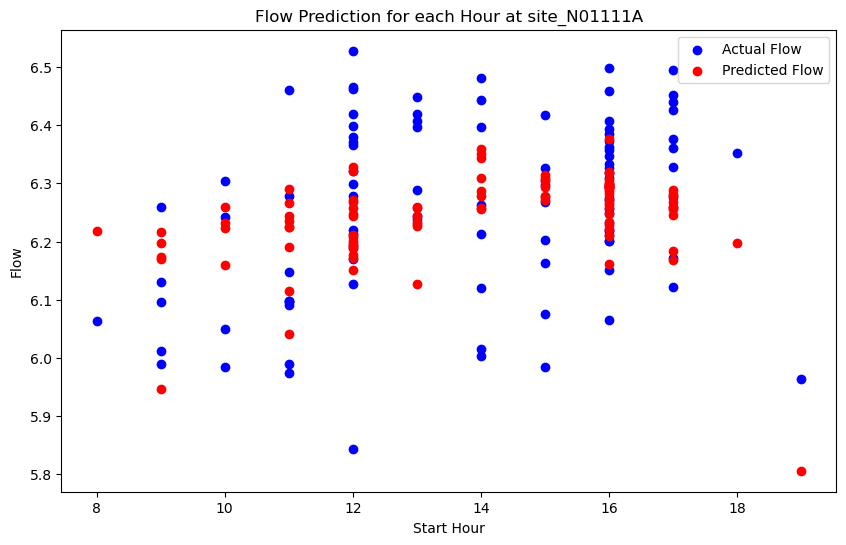

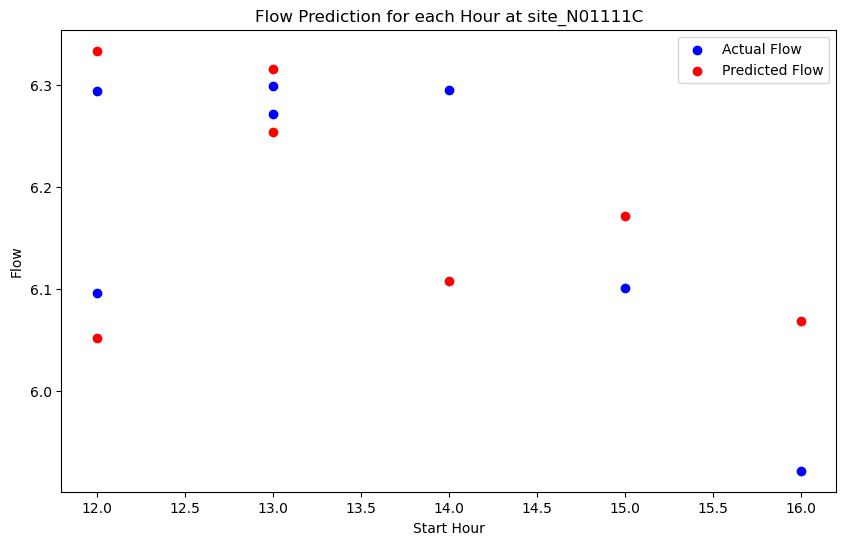

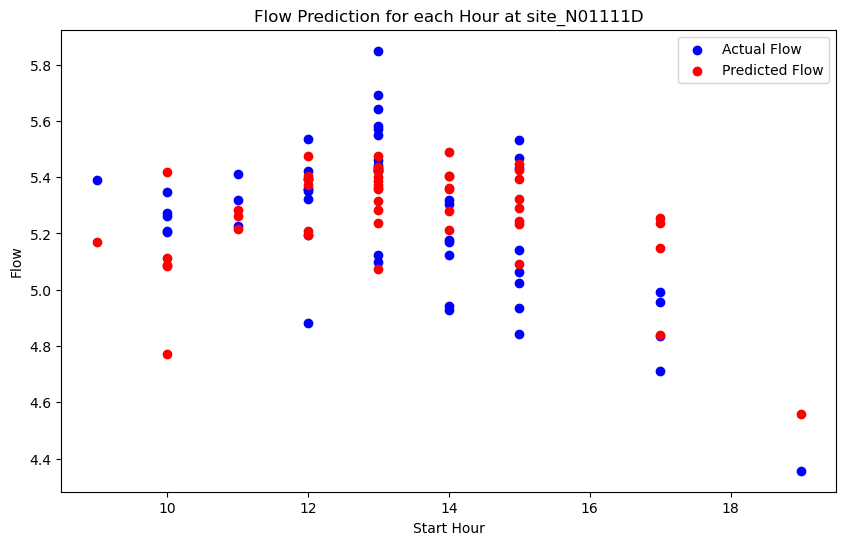

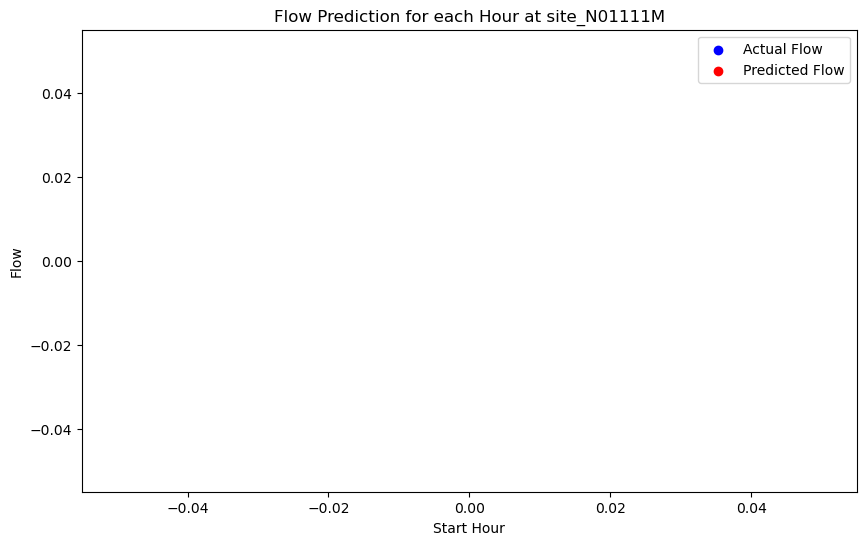

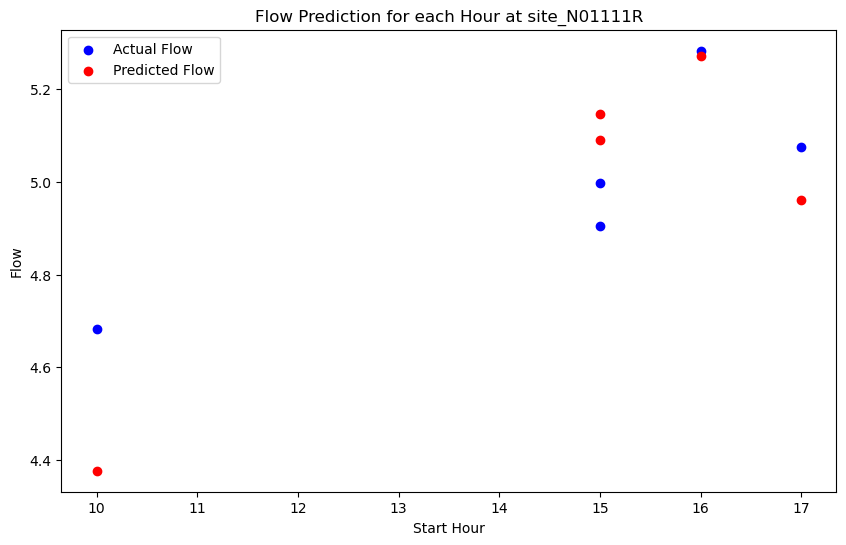

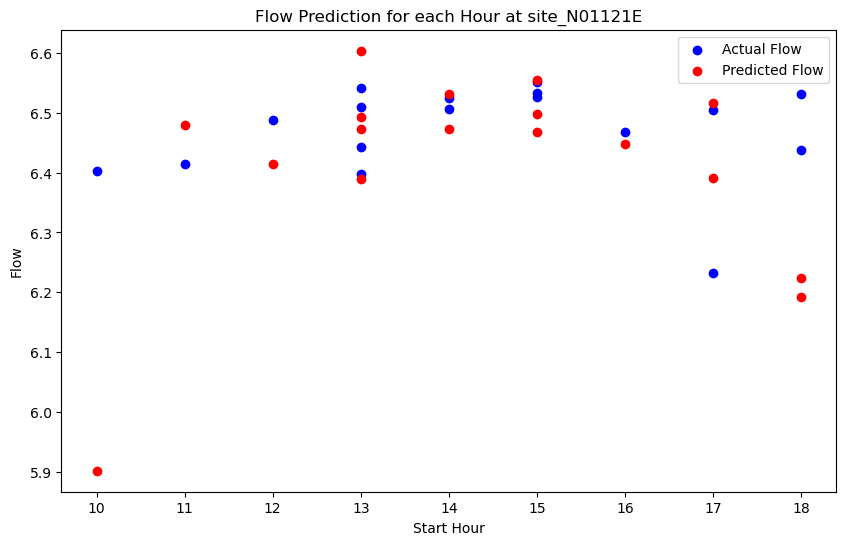

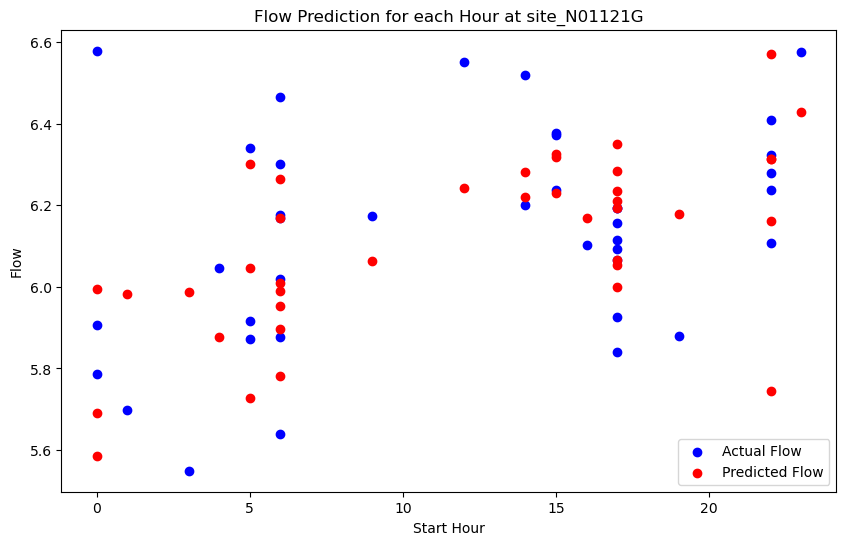

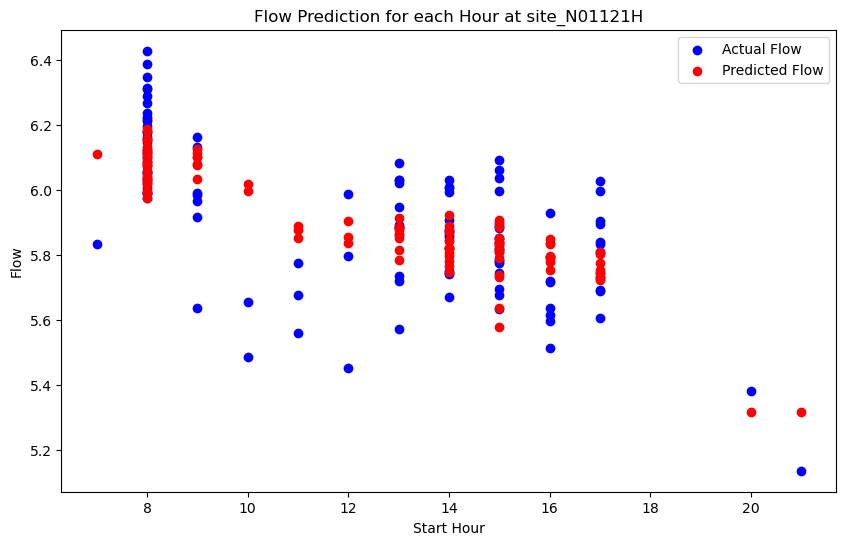

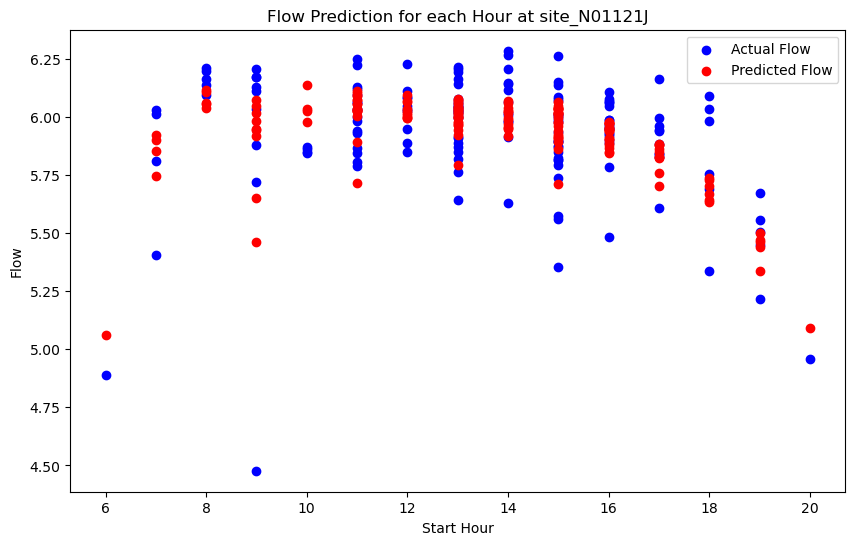

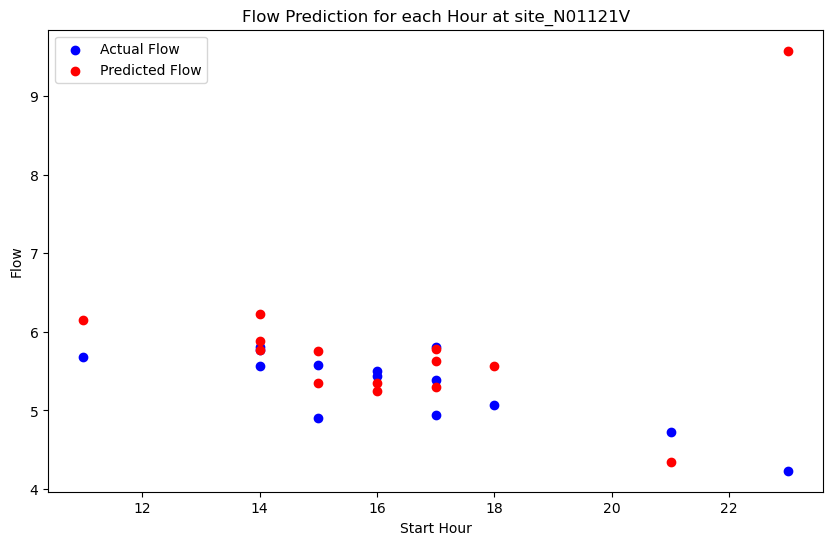

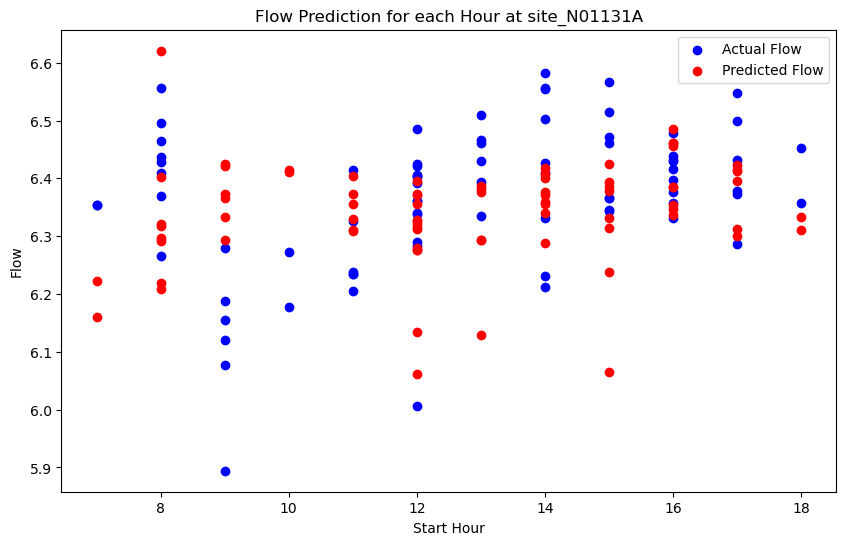

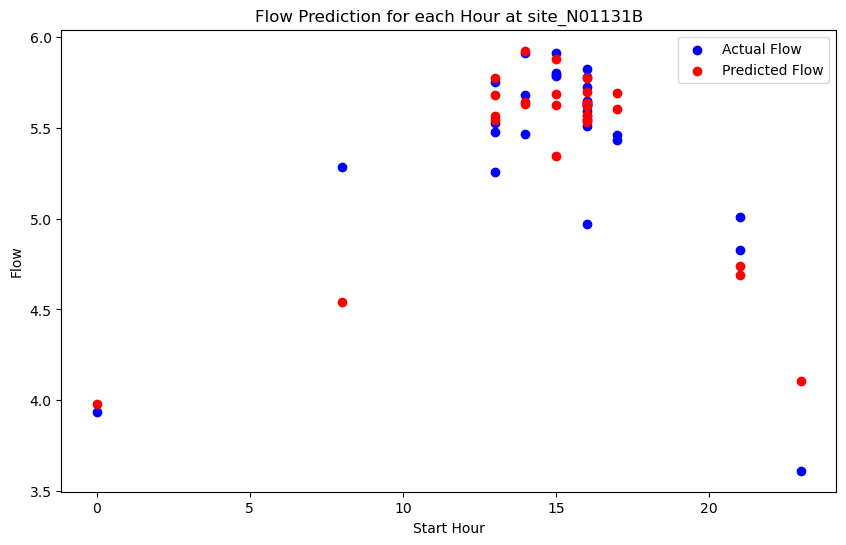

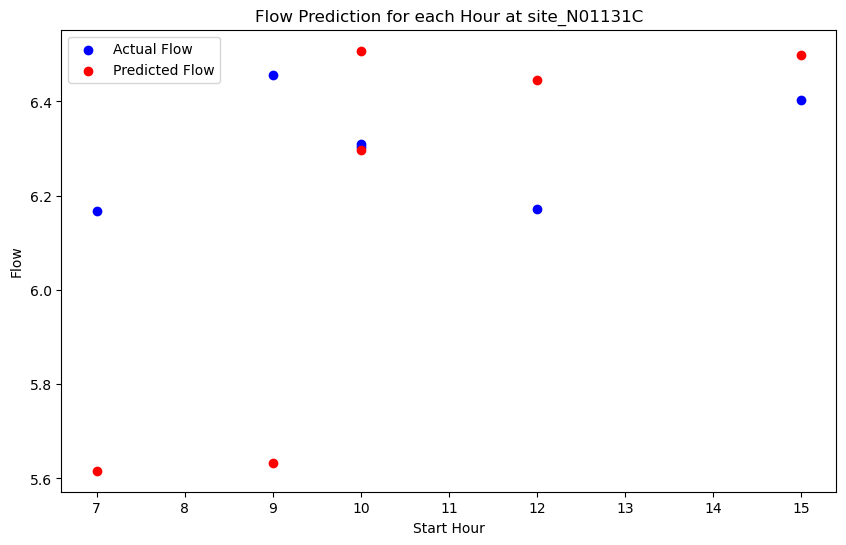

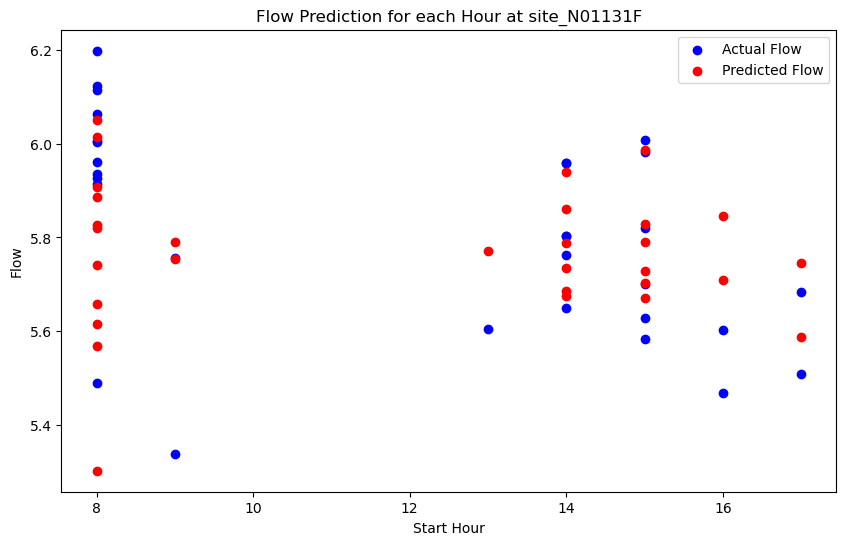

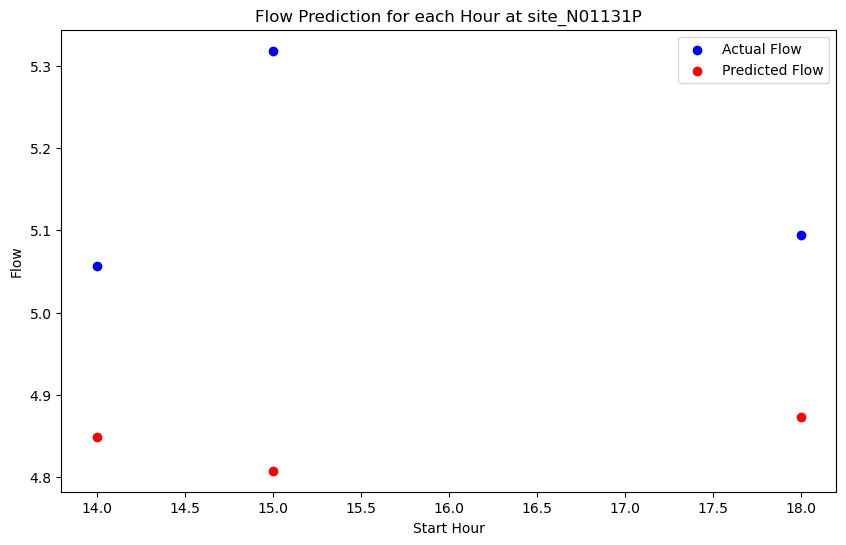

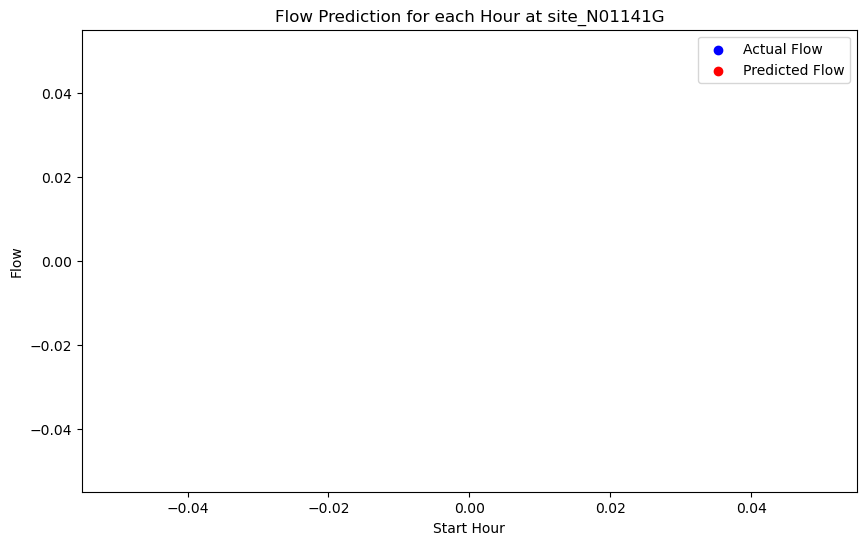

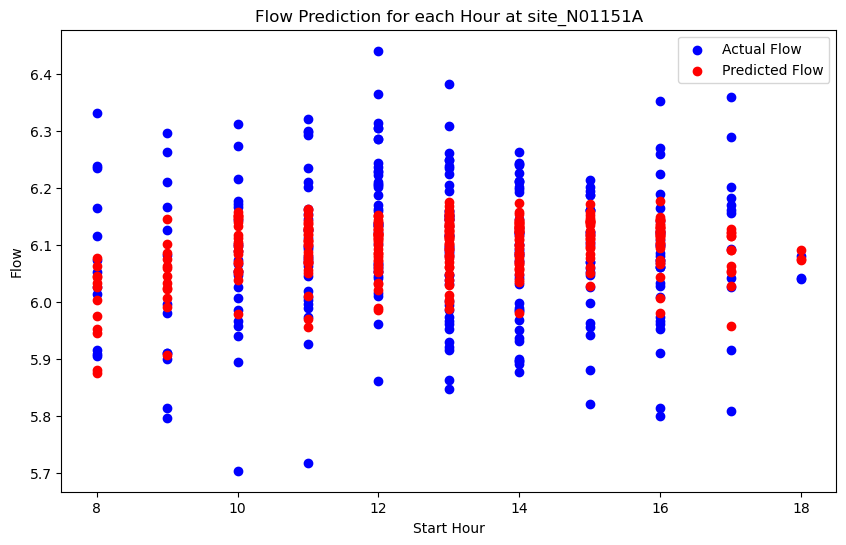

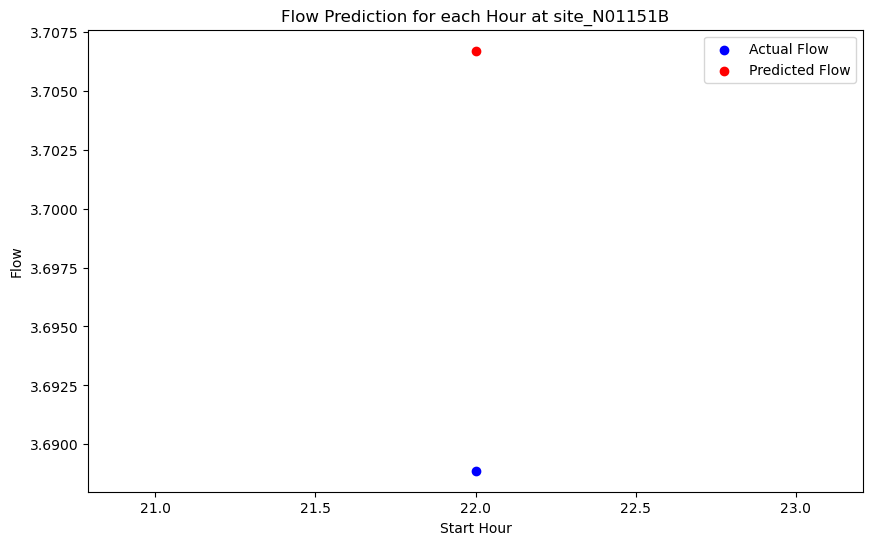

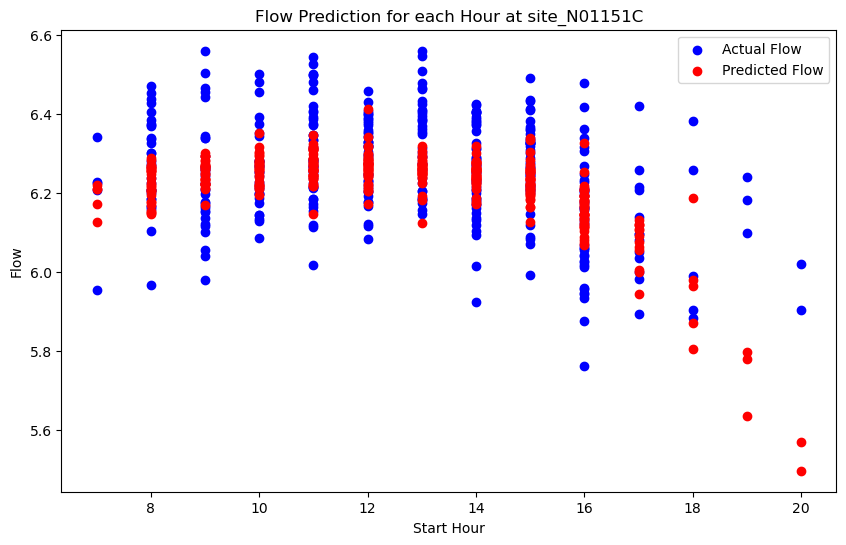

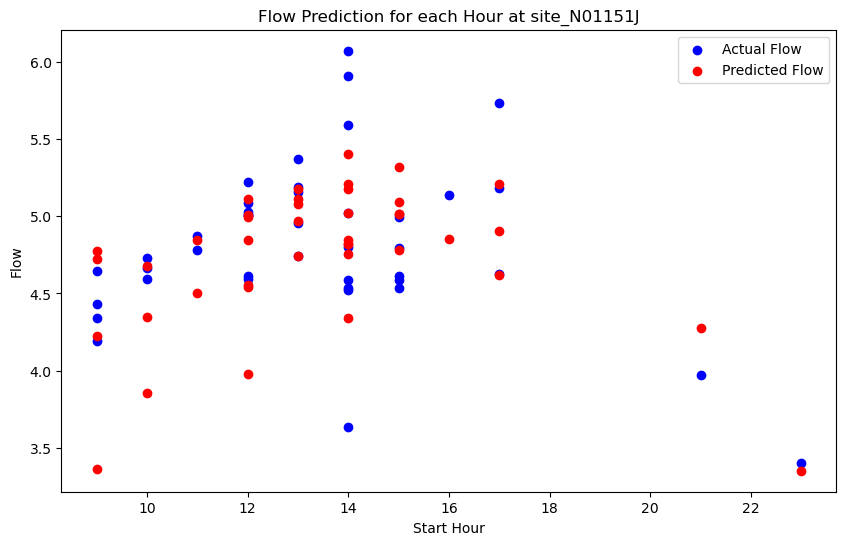

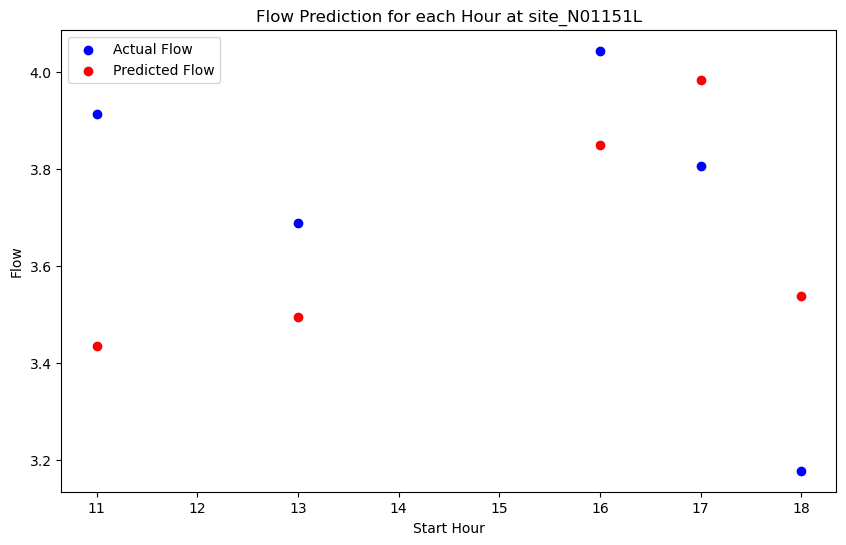

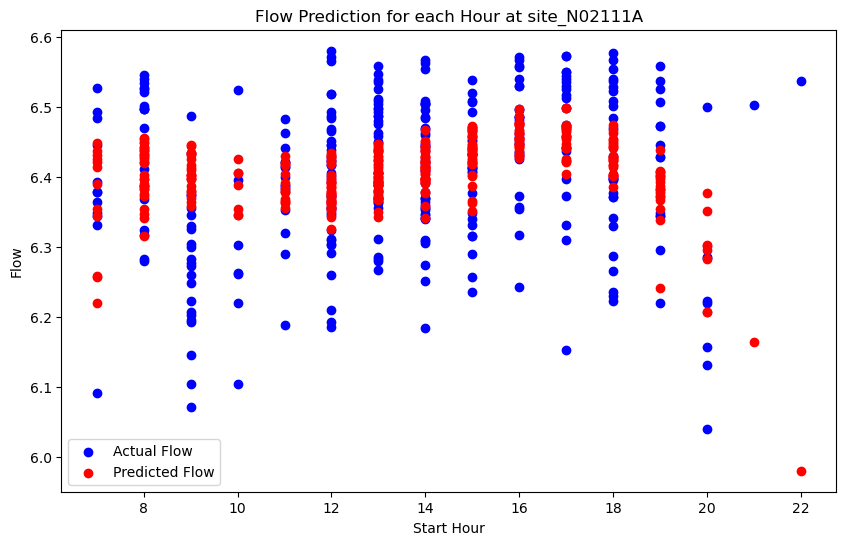

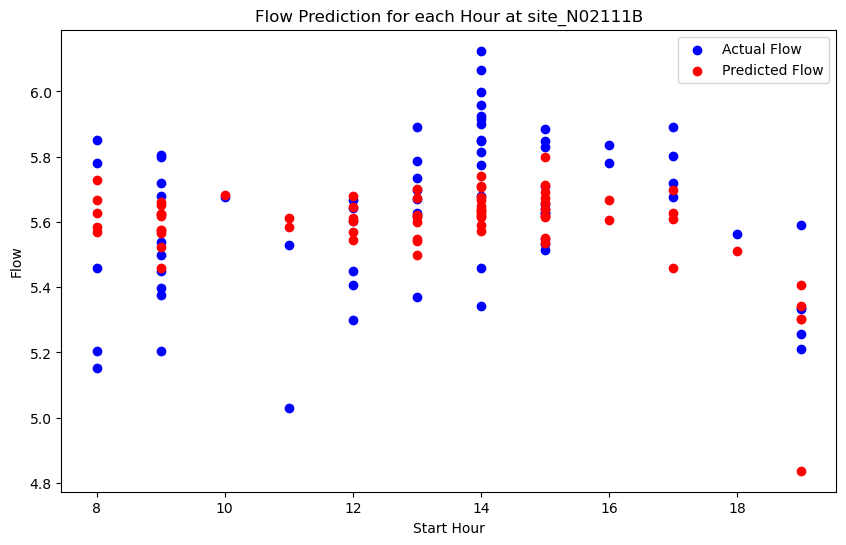

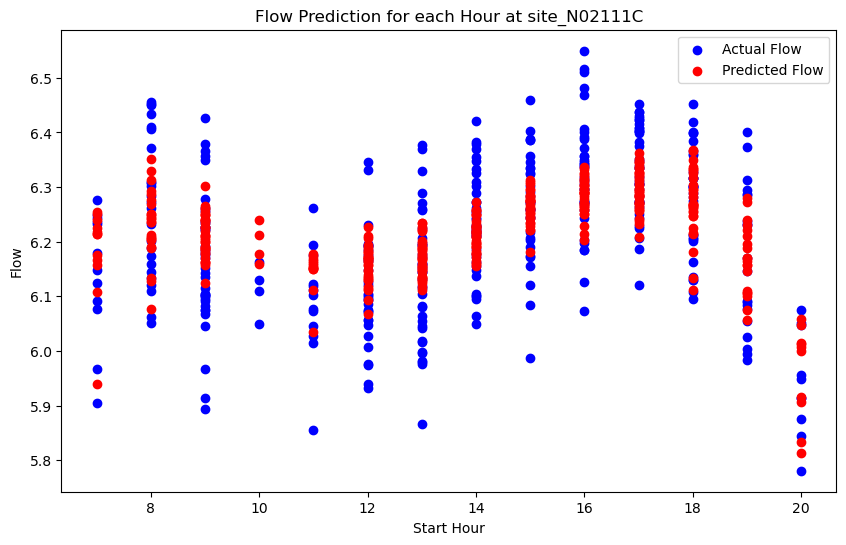

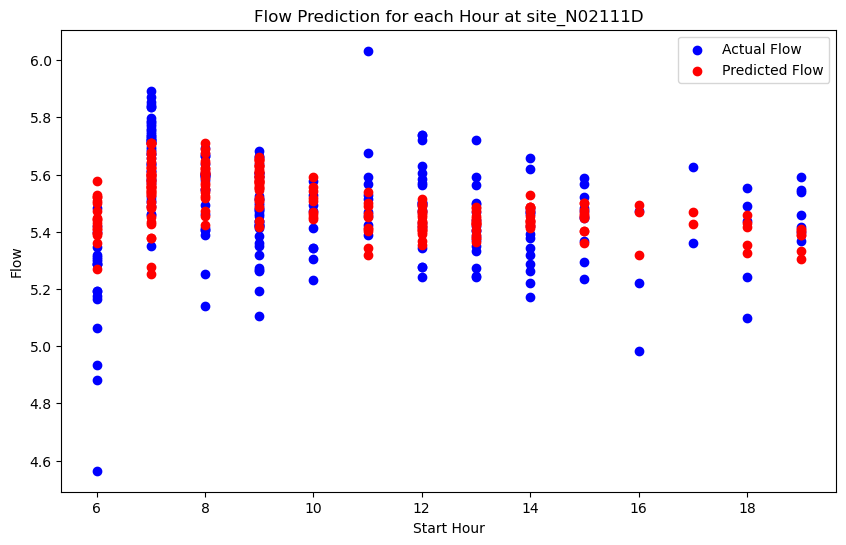

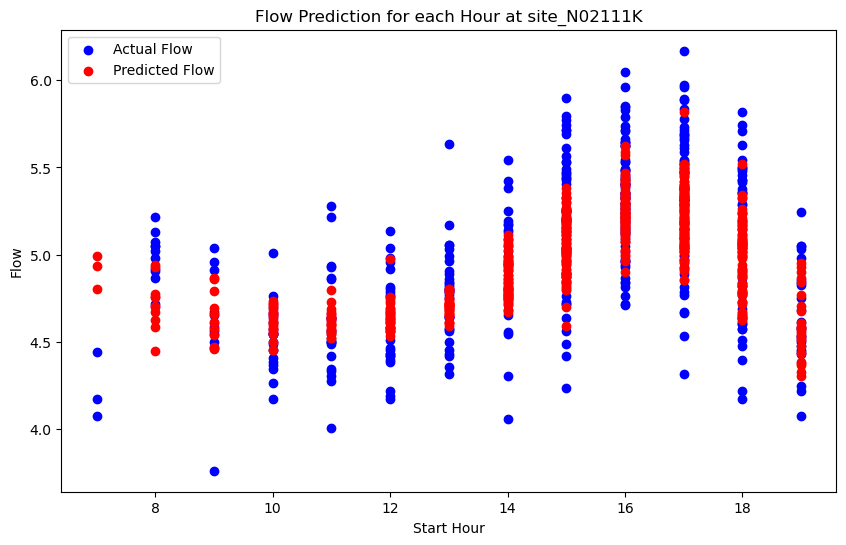

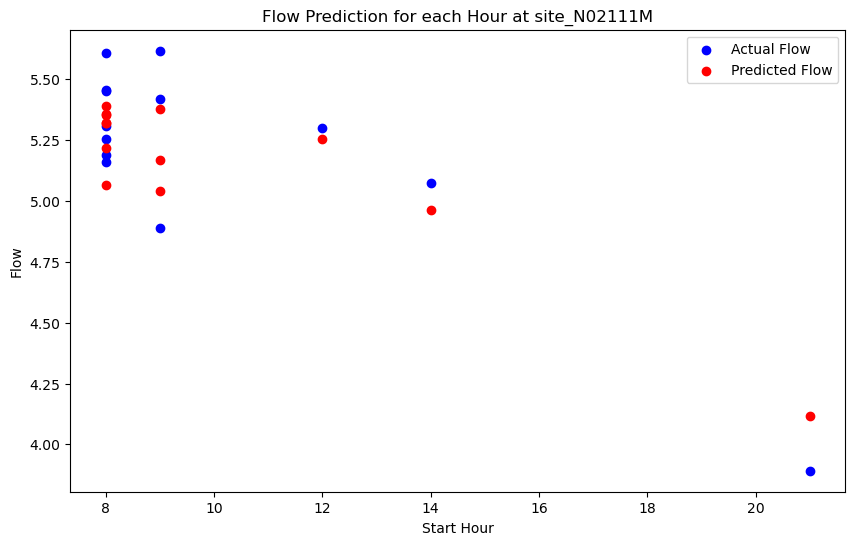

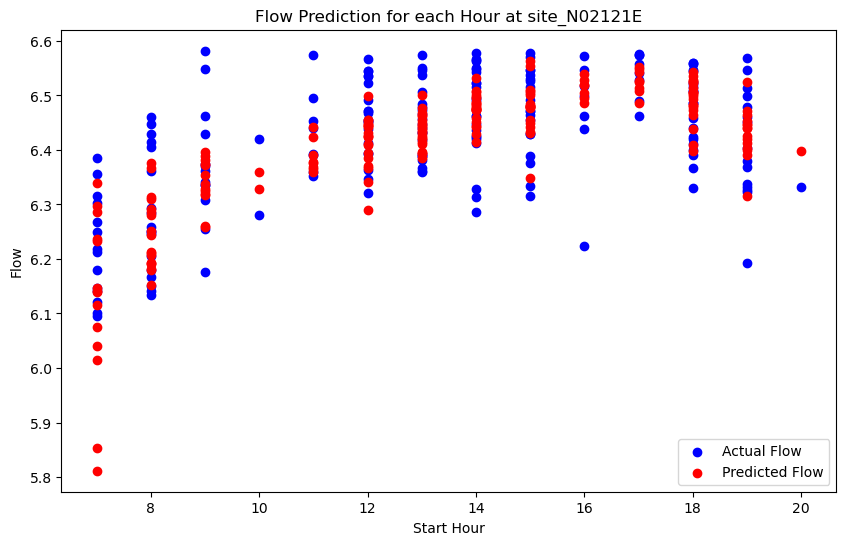

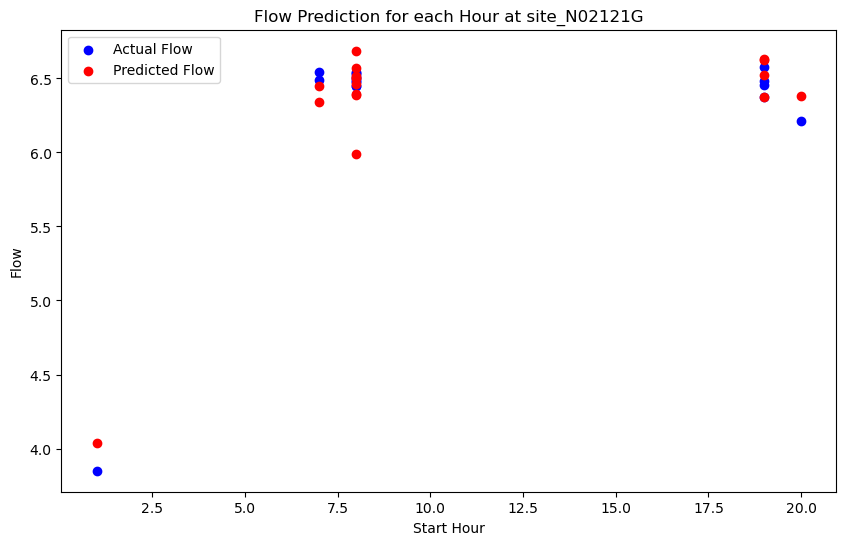

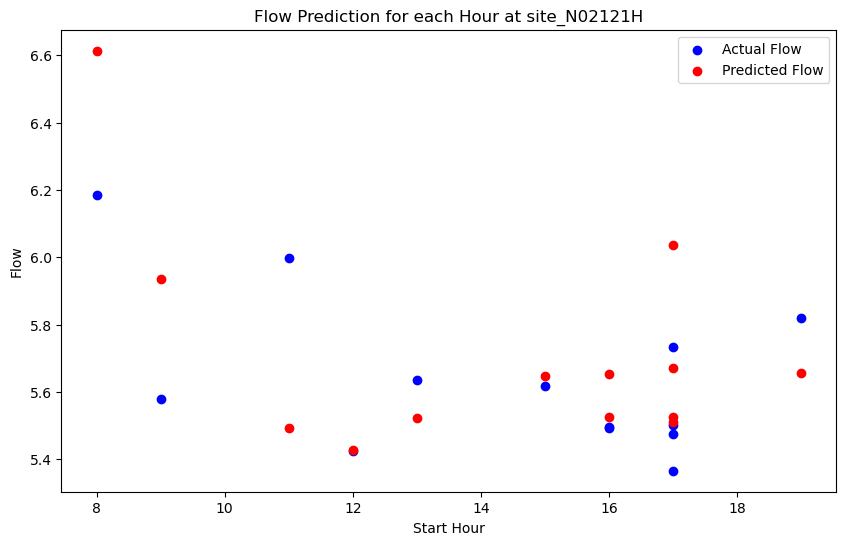

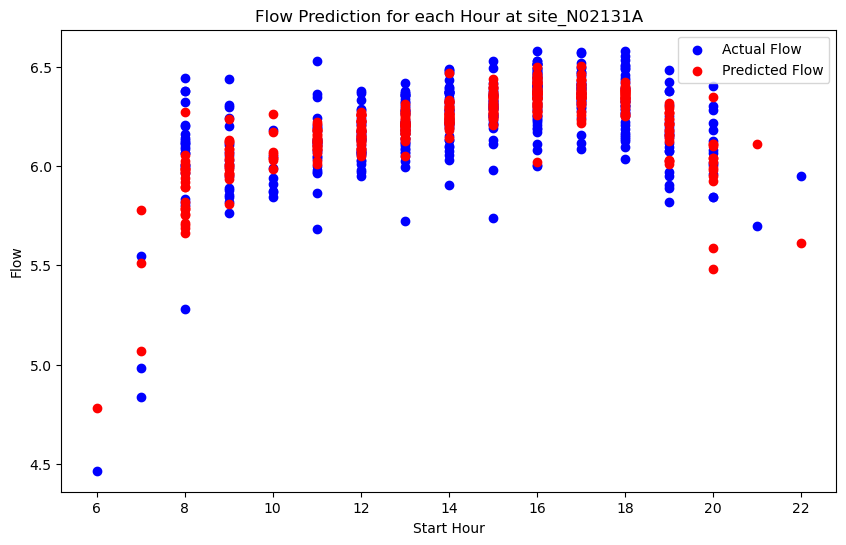

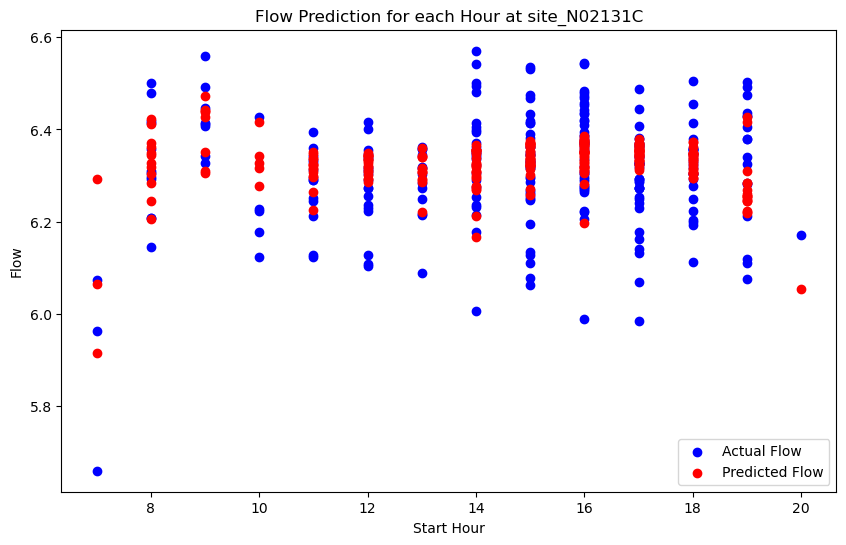

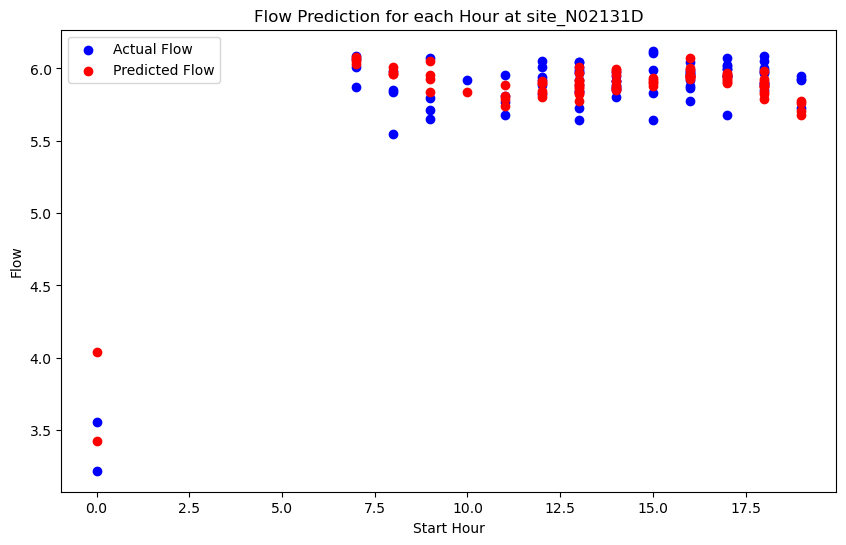

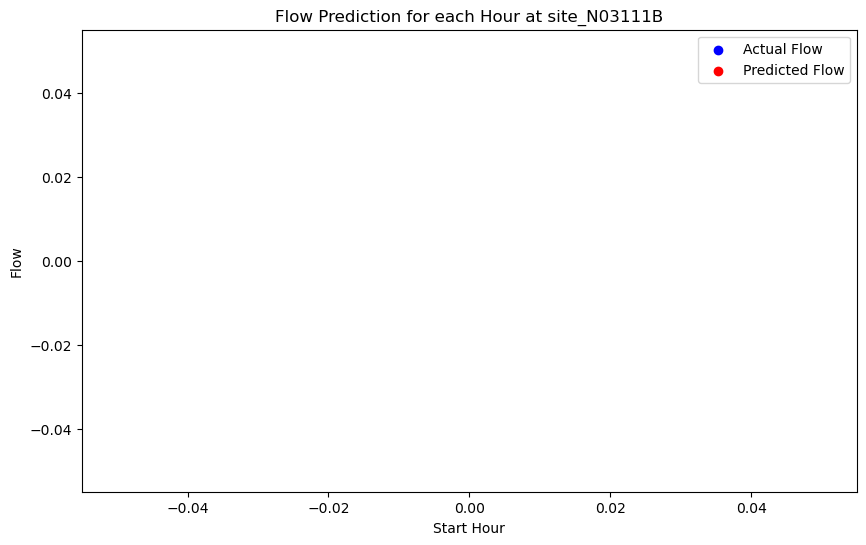

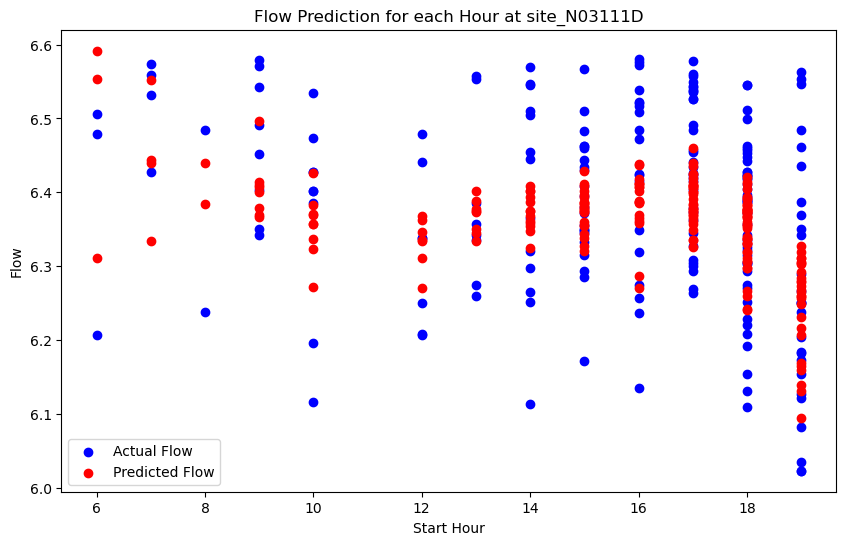

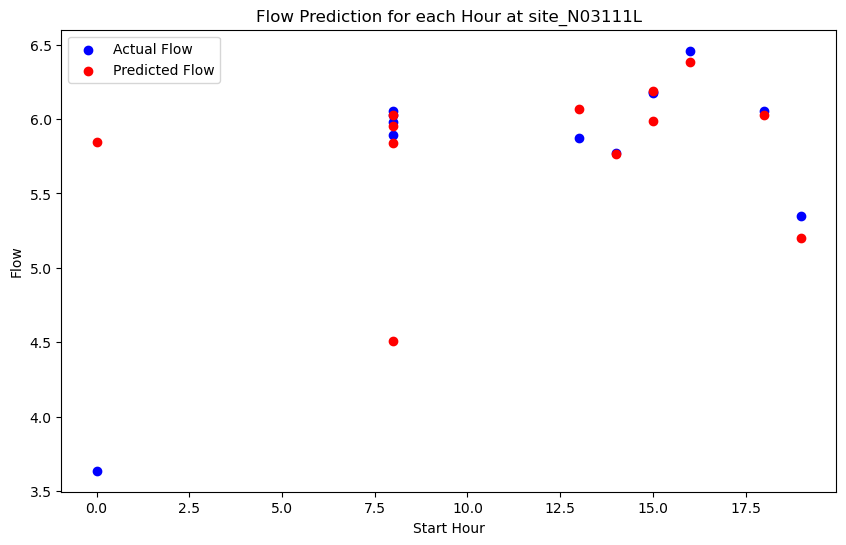

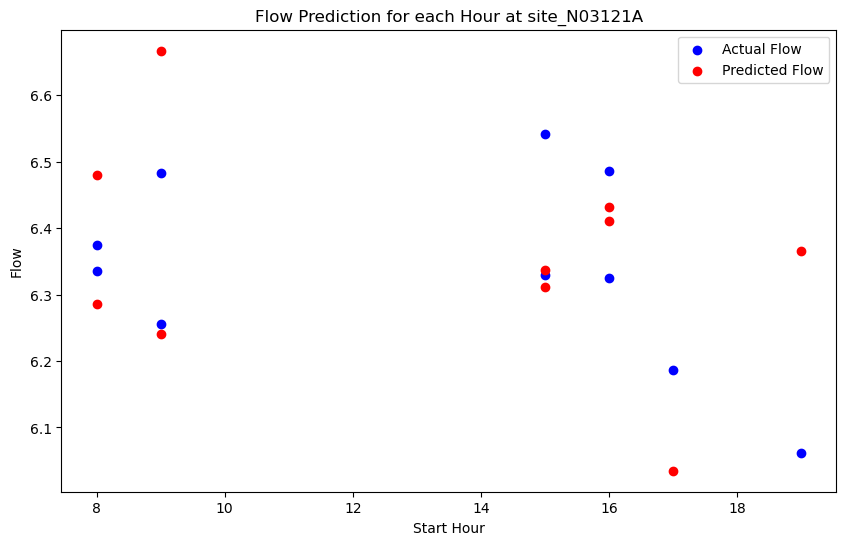

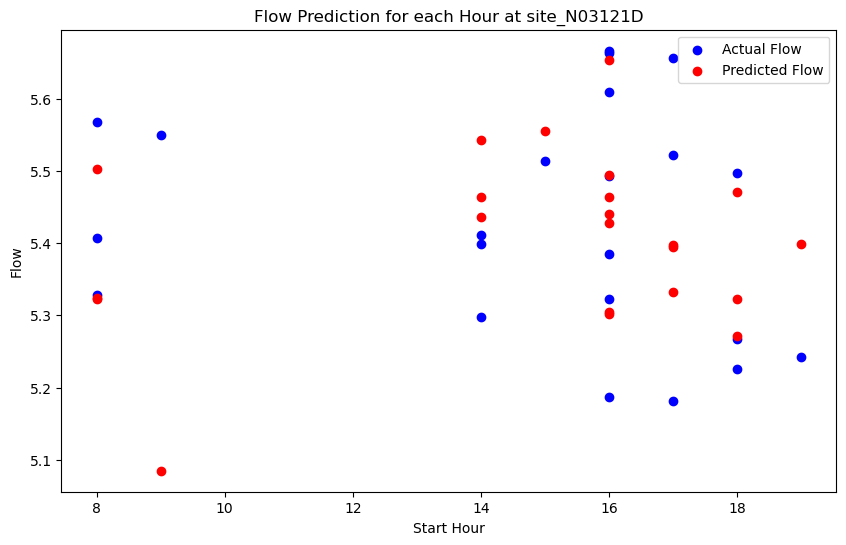

In [43]:
# Ensure the best model is selected
best_model = best_result['model']

# Predict on reshaped test set with the best model
predictions = best_model.predict(X_test_reshaped)

# Assuming sites_columns is defined. If not, you'll need to adjust this part.

for site in sites_columns:
    # Create a mask for the current site in the test data
    # Note: This assumes your X_test DataFrame still has a column to identify sites,
    # otherwise, adjust this part to correctly identify the site's test data.
    site_mask = X_test[site] == 1

    # Apply mask to y_test and predictions to filter the data for the current site
    y_test_site = y_test[site_mask]
    predictions_site = predictions[site_mask]
    
    # Extract the start_hour for the current site
    start_hour_test_site = start_hour_test[site_mask]
    
    # Sort by start_hour for better plotting
    sorted_indices = np.argsort(start_hour_test_site)
    start_hour_test_site_sorted = start_hour_test_site.iloc[sorted_indices]
    y_test_site_sorted = y_test_site.iloc[sorted_indices]
    predictions_site_sorted = predictions_site[sorted_indices]
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(start_hour_test_site_sorted.reset_index(drop=True), y_test_site_sorted['flow'], label='Actual Flow', color='blue')
    plt.scatter(start_hour_test_site_sorted.reset_index(drop=True), predictions_site_sorted[:, 0], label='Predicted Flow', color='red')
    plt.title(f'Flow Prediction for each Hour at {site}')
    plt.xlabel('Start Hour')
    plt.ylabel('Flow')
    plt.legend()
    plt.show()

### Base:

In [ ]:
# Assuming predictions is a numpy array with shape (n_samples, 3) where columns correspond to 'cong', 'flow', 'dsat'
# and Y_test is a DataFrame or a numpy array with the same structure

# Convert Y_test to numpy array if it's not already
Y_test_np = Y_test.to_numpy()

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Titles for each subplot
titles = ['Congestion', 'Flow', 'DSAT']

for i in range(3):
    axs[i].plot(Y_test_np[:, i], label='Actual', marker='o')
    axs[i].plot(predictions[:, i], label='Predicted', linestyle='--', marker='x')
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('Sample Index')
    axs[i].set_ylabel('Value')
    axs[i].legend()

plt.tight_layout()
plt.show()


In [100]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming predictions is a numpy array with shape (n_samples, 3) where columns correspond to 'cong', 'flow', 'dsat'
# and Y_test is a DataFrame or a numpy array with the same structure

# Convert Y_test to numpy array if it's not already
Y_test_np = Y_test.to_numpy()

# Titles for each subplot
titles = ['Congestion', 'Flow', 'DSAT']

# Create subplots
fig = make_subplots(rows=3, cols=1, subplot_titles=titles)

for i in range(3):
    fig.add_trace(go.Scatter(x=list(range(len(Y_test_np[:, i]))), y=Y_test_np[:, i], mode='lines+markers', name='Actual ' + titles[i]), row=i+1, col=1)
    fig.add_trace(go.Scatter(x=list(range(len(predictions[:, i]))), y=predictions[:, i], mode='lines+markers', name='Predicted ' + titles[i], line=dict(dash='dash')), row=i+1, col=1)

# Update layout
fig.update_layout(height=900, width=700, title_text="Comparison of Actual and Predicted Values", showlegend=False)

# For each subplot, you can set individual titles, but they're already set via subplot_titles
for i, title in enumerate(titles):
    fig['layout']['yaxis' + str(i + 1)]['title'] = 'Value'
    fig['layout']['xaxis' + str(i + 1)]['title'] = 'Sample Index'

fig.show()


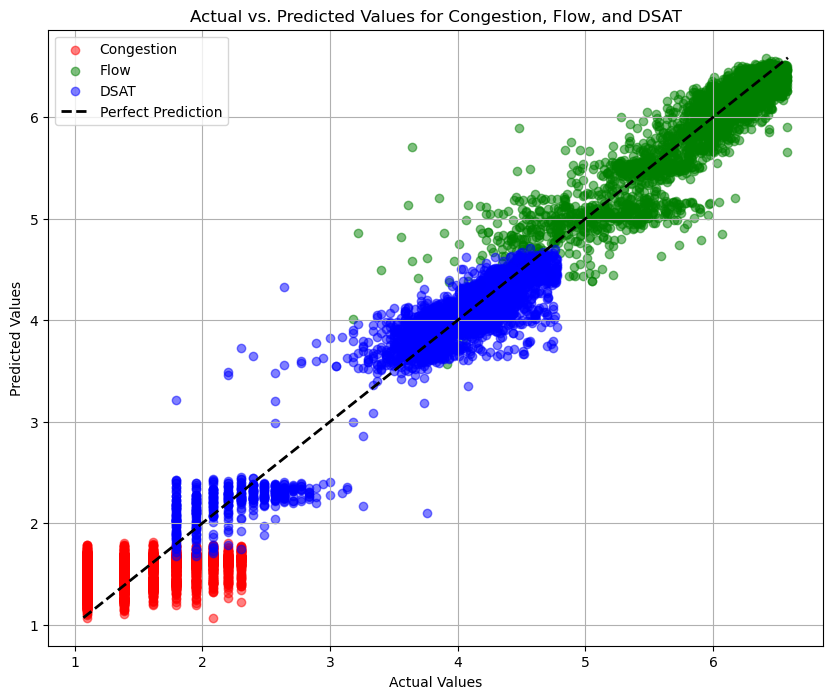

In [101]:
# Titles for each target variable
titles = ['Congestion', 'Flow', 'DSAT']

# Colors for each target variable
colors = ['red', 'green', 'blue']

# Create a figure and axis for the plot
plt.figure(figsize=(10, 8))

# Plot each target variable
for i in range(3):
    # Scatter plot of actual vs. predicted values
    plt.scatter(Y_test_np[:, i], predictions[:, i], color=colors[i], alpha=0.5, label=titles[i])
    
# Plot a line of perfect prediction
max_val = max(np.max(Y_test_np), np.max(predictions))
min_val = min(np.min(Y_test_np), np.min(predictions))
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Congestion, Flow, and DSAT')
plt.legend()
plt.grid(True)
plt.show()


In [102]:
import plotly.graph_objects as go

# Assuming predictions is a numpy array with shape (n_samples, 3) where columns correspond to 'cong', 'flow', 'dsat'
# and Y_test is a DataFrame or a numpy array with the same structure

# Convert Y_test to numpy array if it's not already
Y_test_np = Y_test.to_numpy()

# Create a 3D scatter plot
fig = go.Figure()

# Actual values
fig.add_trace(go.Scatter3d(x=Y_test_np[:, 0], y=Y_test_np[:, 1], z=Y_test_np[:, 2],
                           mode='markers', name='Actual',
                           marker=dict(size=5, color='blue', opacity=0.8)))

# Predicted values
fig.add_trace(go.Scatter3d(x=predictions[:, 0], y=predictions[:, 1], z=predictions[:, 2],
                           mode='markers', name='Predicted',
                           marker=dict(size=5, color='red', opacity=0.8)))

# Update plot layout to make the figure larger
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title="3D Scatter Plot of Actual vs. Predicted Values",
                  scene=dict(
                      xaxis_title='Congestion',
                      yaxis_title='Flow',
                      zaxis_title='DSAT'
                  ),
                  width=900,  # Width of the figure in pixels
                  height=600   # Height of the figure in pixels
                  )

fig.show()


### Weekends (Sat & Sun)